[Enlace](https://medium.com/@ashwin.narayana6/prediction-of-diabetes-using-logistic-regression-accuracy-85-b5cf420cd57c)

# Prediction of diabetes using Logistic regression

## **1. About the dataset:** 

This dataset is originally from the “National Institute of Diabetes and Digestive and Kidney Diseases”, which is available on [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). In particular, all patients here are females, at least 21 years old of Pima Indian heritage. The dataset consists of several medical predictor variables and one outcome variable. The independent variables are as follows:

* **Pregnancies:** The number of times the person has been pregnant.
* **Glucose:** Plasma glucose concentration after 2 hours in an oral glucose tolerance test. It is a medical test in which glucose is given first to the person and blood samples are tested afterwards to determine how quickly it is cleared from the blood.
* **Blood Pressure:** Diastolic blood pressure (mm Hg). Generally, a diastolic blood pressure of less than 80 is considered normal.
* **Skin Thickness:** Triceps skin fold thickness (mm). It provides an index of body fat.
* **BMI:** Body mass index.
* **Insulin:** 2-Hour serum insulin (mu U/ml). This test measures the amount of insulin in the blood.
* **Diabetes Pedigree function:** Likelihood of getting affected by diabetes based on family history.
* **Age:** Age of the person.

And the dependent class variable:

* **Outcome:** 0 if the person is **non-diabetic**, 1 if the person is **diabetic**.

## **2. Data preparation:**

In [1]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Import dataset

path = r'Data\diabetes.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

33250.0

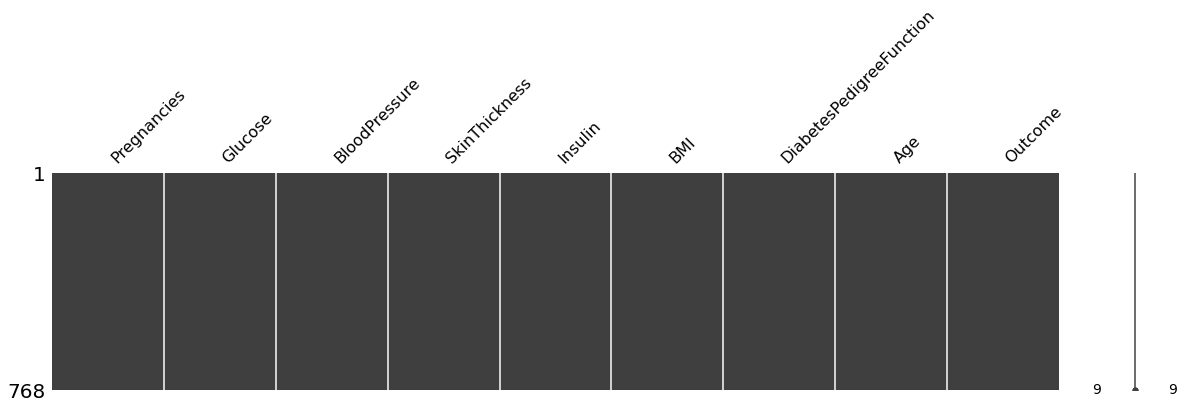

In [8]:
# Missing values

missing_values = msno.matrix(df, figsize=(20,4))

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


in this case the 25th percentile of both Insulin and Skin thickness is 0. This says that nearly 25% of the values are zero in both the columns which could be due to incorrect data that needs to be corrected.

In [10]:
# Outcome variable

df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

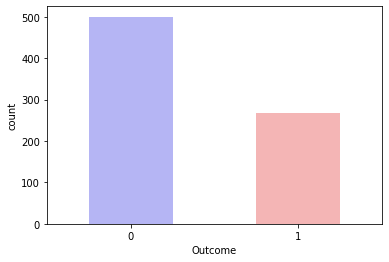

In [11]:
f = sns.countplot(x='Outcome', data=df, palette='bwr', width=0.5)
plt.show()

From the above visualization we can see that there are 268 Diabetic patients and 500 non-diabetic patients in the dataset.

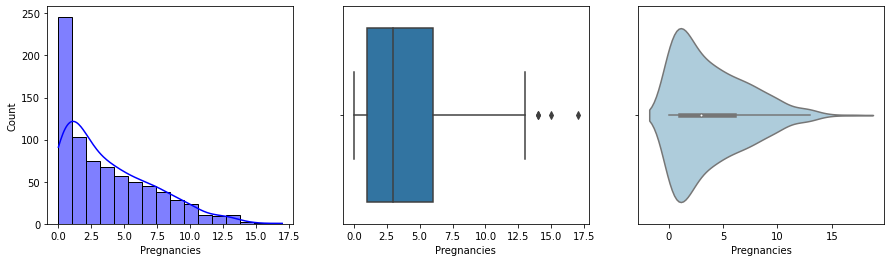

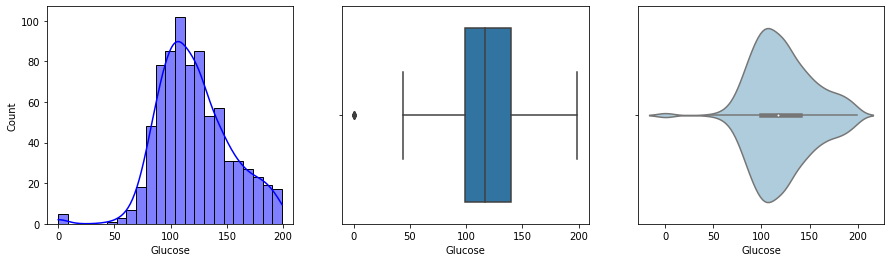

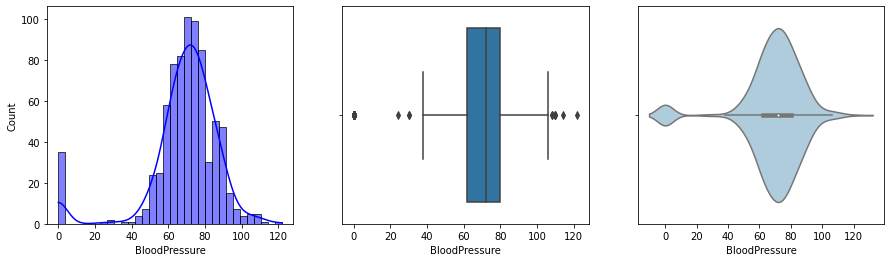

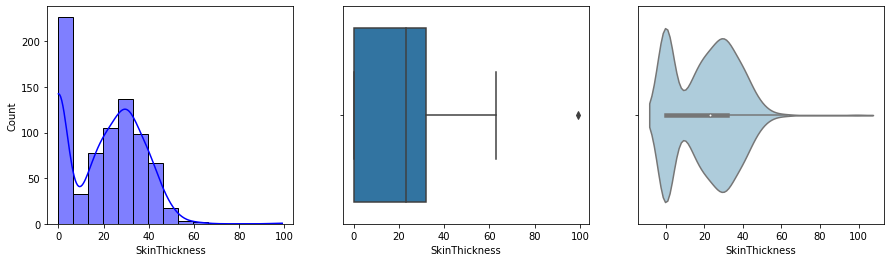

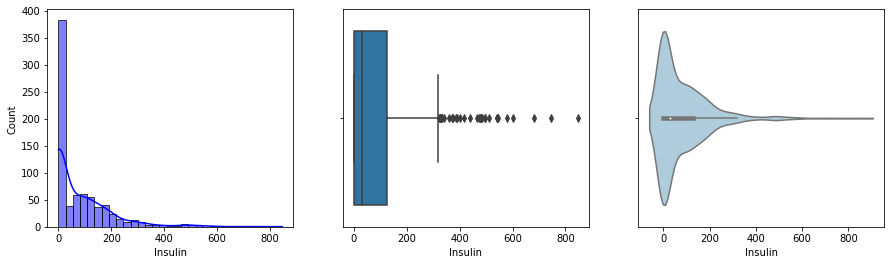

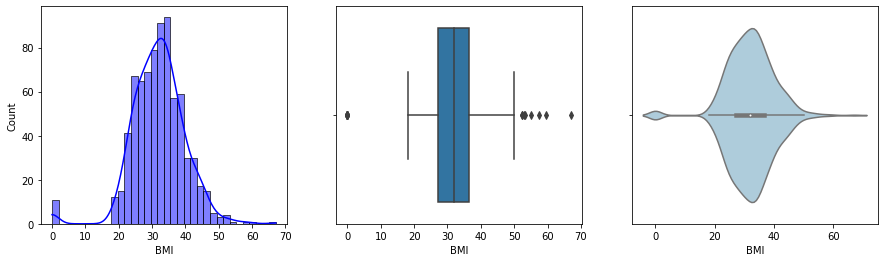

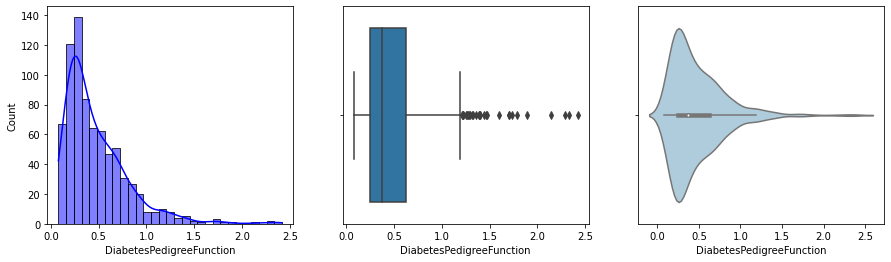

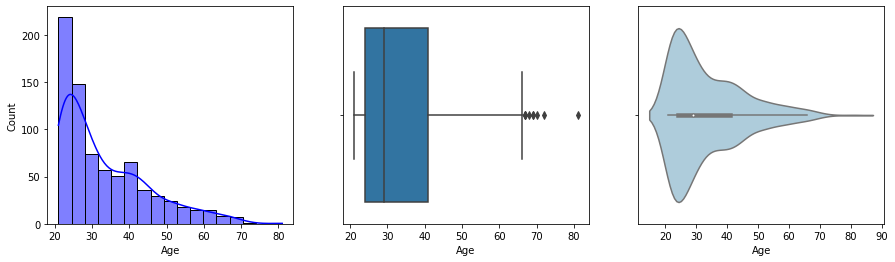

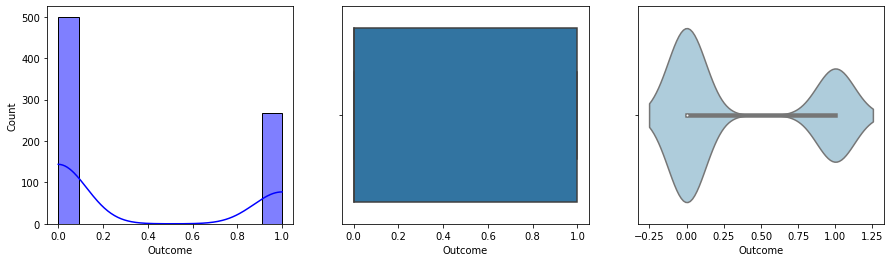

In [18]:
# Visualization of input vairalbes:

for i in df.columns:
    fig, ax = plt.subplots(1, 3, figsize = (15,4))
    sns.histplot(data = df, x = i, ax = ax[0], kde=True, color='blue')
    sns.boxplot(data = df, x = i, ax = ax[1])
    sns.violinplot(data = df, x = i, ax=ax[2], palette="Paired")

Pregnancies, Diabetes pedigree function, Age seem to have no outliers as a woman giving birth 17 times is not impossible. Whereas, the other variables such as glucose, blood pressure, skin thickness, BMI, insulin has incorrect data and need to be handled

In [3]:
# Handling incorrect values:

def median(var):
    df[var] = df[var].replace(0, np.nan)
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

This function gets the median value seperately for diabetic patients and non- diabetic patients.

In [4]:
# Glucose

(df['Glucose']==0).sum()

5

In [5]:
median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


Glucose levels cannot be 0 for a person, so we replace it with the median values.

In [6]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

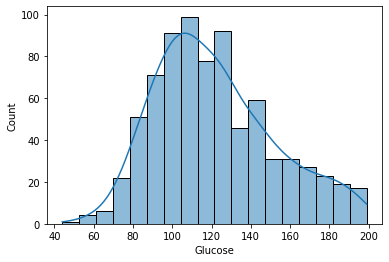

In [8]:
sns.histplot(df, x = df['Glucose'], kde = True)
plt.show()

After replacing the 0’s with the median values, a bell curve can be seen from the above visualisation which signifies the data is now normally distributed.

Diabetic patients are replaces with 140, where as non-diabetic patients are replaced with 107

Similarly, the incorrect values for other columns are also replaced using the same median function

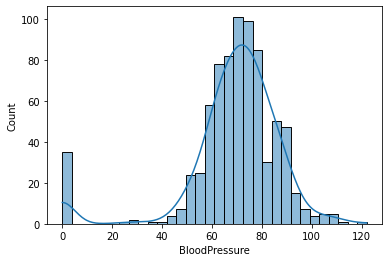

In [9]:
# Blood pressure

sns.histplot(df, x=df['BloodPressure'], kde=True)
plt.show()

In [10]:
(df['BloodPressure']==0).sum()

35

Blood pressure of a living person can’t be zero, there are 35 incorrect values.

In [17]:
median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [12]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

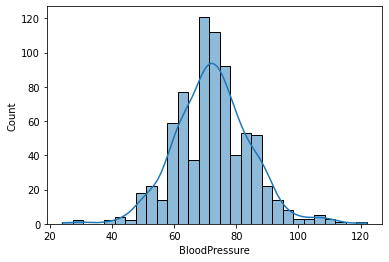

In [13]:
sns.histplot(df, x=df['BloodPressure'], kde=True)
plt.show()

Now the data is normally distributed, after replacing it with the median values.

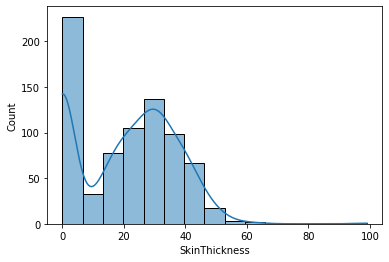

In [15]:
# Skin Thickness

sns.histplot(df, x=df['SkinThickness'], kde=True)
plt.show()

In [18]:
median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [19]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

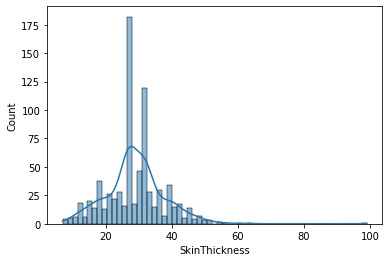

In [20]:
sns.histplot(df, x=df['SkinThickness'], kde=True)
plt.show()

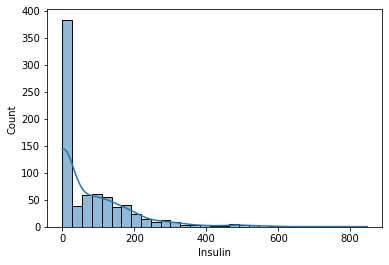

In [21]:
# Insulin

sns.histplot(df, x=df['Insulin'], kde=True)
plt.show()

In [23]:
(df['Insulin']==0).sum()

374

In [25]:
median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [26]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

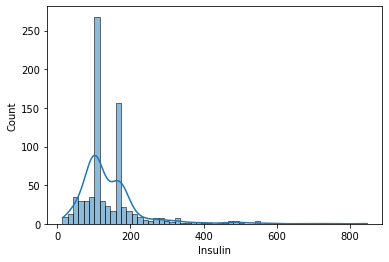

In [27]:
sns.histplot(df, x=df['Insulin'], kde=True)
plt.show()

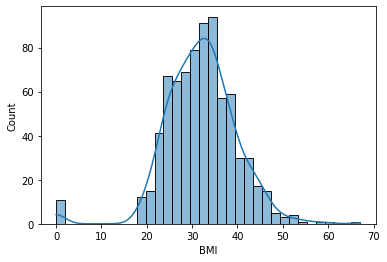

In [28]:
# BMI

sns.histplot(df, x=df['BMI'], kde=True)
plt.show()

In [29]:
(df['BMI']==0).sum()

11

In [30]:
median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [31]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

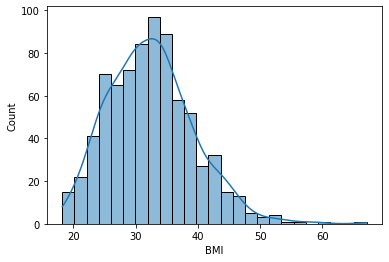

In [32]:
sns.histplot(df, x=df['BMI'], kde=True)
plt.show()

## **3. Feature Engineering:**

The below heatmap shows the correlation between all the variables.



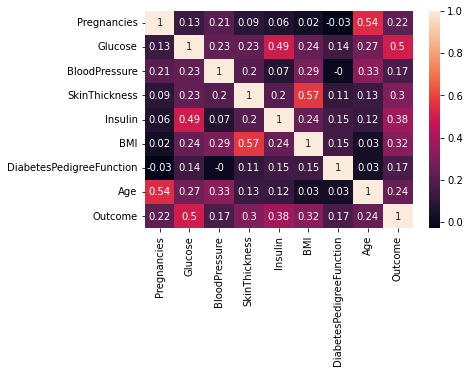

In [35]:
heatmap1 = df.corr().round(2)
sns.heatmap(heatmap1, annot=True)
plt.show()

The brighter the color, the higher it is correlated to the corresponding variable(Positive correlation). If the colour is darker, it shows negative correlation among the variables.

From the heatmap, we can see that **Insulin, BMI and glucose** are significantly correlated to the outcome variable

Next, we normalize the data, since ML models perform substantially better when the data is normalized.

In [40]:
# Normalize the data

norm = MinMaxScaler().fit(df)
X_norm = norm.transform(df)
X_norm1 = pd.DataFrame(X_norm, columns=df.columns)

In [41]:
X_norm1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.186899,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.271739,0.186899,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.106370,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.271739,0.186899,0.243354,0.115713,0.433333,1.0


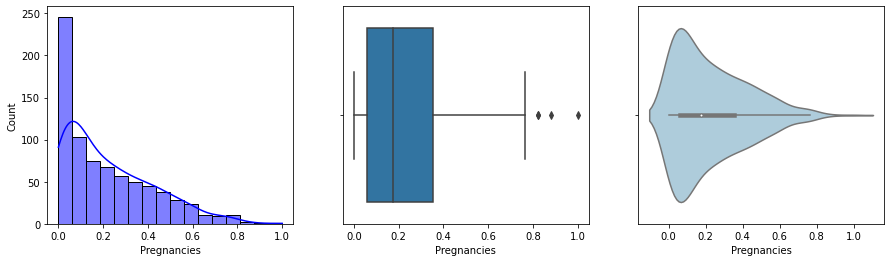

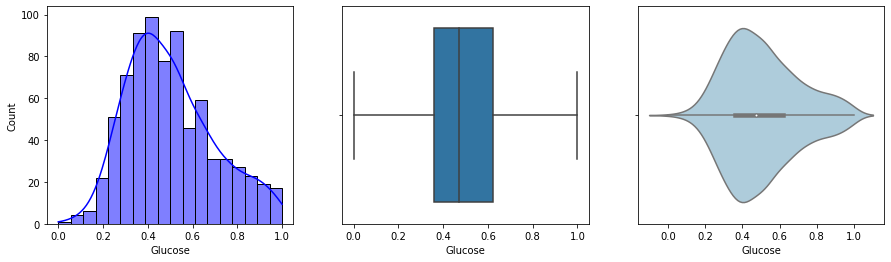

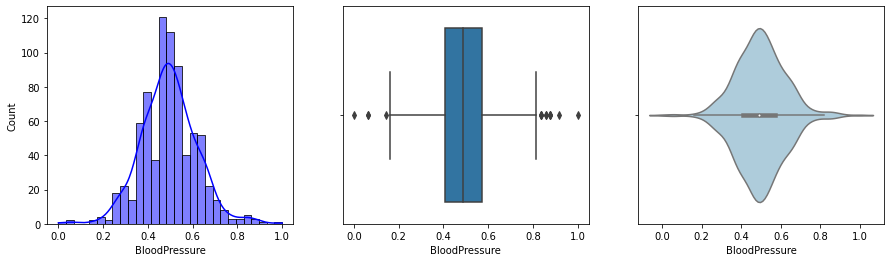

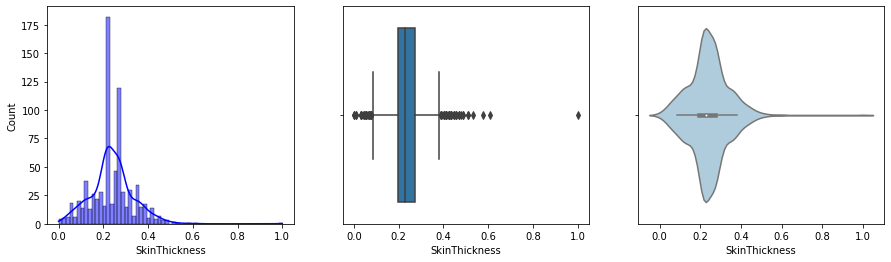

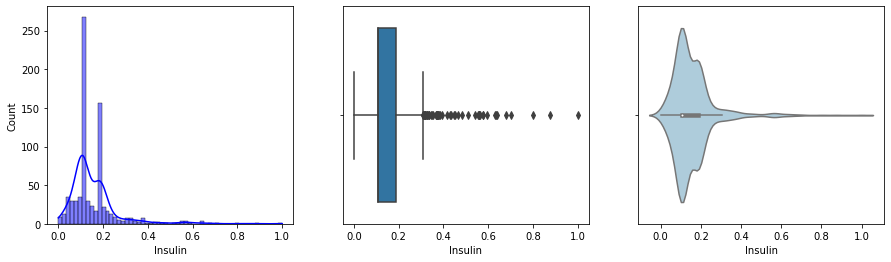

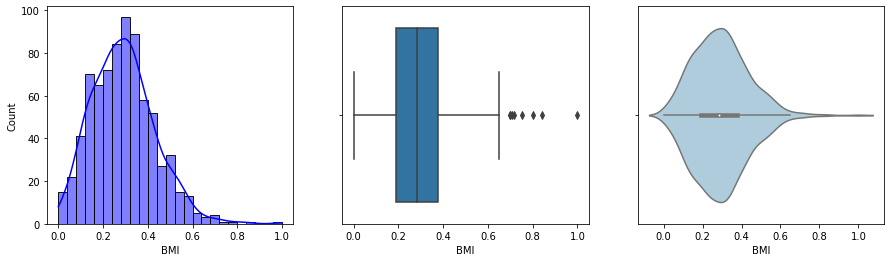

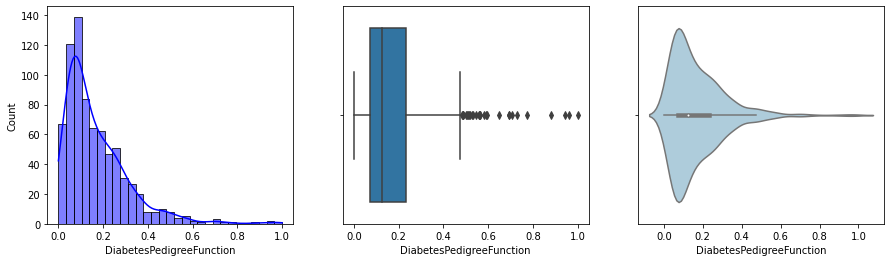

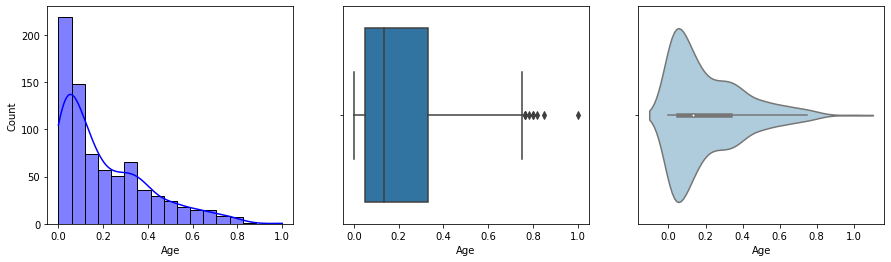

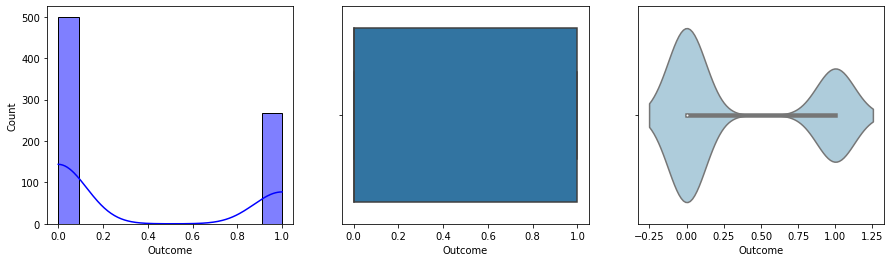

In [43]:
# Visualization of input vairalbes:

for i in df.columns:
    fig, ax = plt.subplots(1, 3, figsize = (15,4))
    sns.histplot(data = X_norm1, x = i, ax = ax[0], kde=True, color='blue')
    sns.boxplot(data = X_norm1, x = i, ax = ax[1])
    sns.violinplot(data = X_norm1, x = i, ax=ax[2], palette="Paired")

## **4. Model Building:**

The first step here is to separate the dependent variable and the independent variables and store them seperately.

In [44]:
X = X_norm1.iloc[:, :-1]
Y = X_norm1.iloc[:, -1]

The next step is to split the dataset into training and testing set. The train_test_split from sklearn is used. The dataset is split in the ratio 80:20, 80% for the training set and 20% for the test set.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Next, LogisticRegression() function with C value=10 and solver = Liblinear from the sklearn library is used to build the model. C value stands for the hyperparameter and solver finds the parameter weights that minimize the cost function.

In [48]:
lr = LogisticRegression(C=10, solver='liblinear')

In [49]:
lr.fit(X_train, Y_train)

LogisticRegression(C=10, solver='liblinear')

## **5. Model Evaluation:**

In [50]:
Y_pred = lr.predict(X_test)

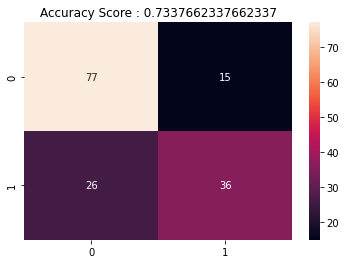

In [51]:
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
sns.heatmap(cm, annot=True)
plt.title('Accuracy Score : {0}'.format(acc))
plt.show()

From the confusion matrix, we can see the type 1 and type 2 errors as 15 and 26.

**Type 1 error (False positive)**— 15, which means the model predicted that 15 patients have diabetes, where as they actually don’t have diabetes.

**Type 2 error (False negative)—** 26, which means the model predicted that 26 patients don’t have diabetes, where as they actually have diabetes.

Whenever the dependent variable is unbalanced, referring to the macro average is a better option because it treats all classes equally

In [52]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79        92
         1.0       0.71      0.58      0.64        62

    accuracy                           0.73       154
   macro avg       0.73      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



# Falta Optimizar Hiperparametros